# Actividad 7 

Licenciatura en tecnologias de la información

19 de Febrero 2026 

Martínez Velarde Jesús Santiago 219439844

## Analisis historico del medallero olimpico 

Dataset olympics_dataset.csv

In [48]:
# Importación de librerias 
# manipulacion de datos y matematicas
import pandas as pd
import numpy as np

#Visualización y graficas 
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learnign 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Despues de importar las librerias, se carga el dataset 

In [49]:
# Upload dataset 
path = "olympics_dataset.csv"
df = pd.read_csv(path)

# Exploracion de las primeras 5 lineas para ver que se cargo bien 
print("Dimensión (Filas, Columnas)", df.shape)
display(df.head())


Dimensión (Filas, Columnas) (252565, 11)


,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


# Limpieza y preparación de datos
Eliminar atletas duplicados y agrupar los datos para contar cuantas medallas gano cada pais en cada año.

- Predecir pais por año
- Eliminar las filas con "no medal"
- El dataset esta distribuido por atletas, se necesitan identificar los que pertenecen a deportes en equipo y ganan medalla en conjunto para agruparlos

In [51]:
# limpieza de datos
# 1. Filtrar a los atletas que sí ganaron medalla
df_limpio = df[df['Medal'] != 'No medal'].copy()

# 2. Eliminar duplicados de los deportes de equipo (una sola medalla por evento)
df_unicos = df_limpio.drop_duplicates(subset=['Year', 'Season', 'NOC', 'Event', 'Medal'])

# 3. Agrupar y contar las medallas totales por País (NOC) y Año
df_medallero = df_unicos.groupby(['NOC', 'Year']).size().reset_index(name='Total_Medallas')

print("Dataset filtrado y limpio:")
display(df_medallero.head(10))

Dataset filtrado y limpio:


,NOC,Year,Total_Medallas
0,AFG,2008,1
1,AFG,2012,1
2,AHO,1988,1
3,AIN,2024,5
4,ALB,2024,2
5,ALG,1984,2
6,ALG,1992,2
7,ALG,1996,3
8,ALG,2000,5
9,ALG,2008,2


Como se puede visualizar se limpiaron los datos, solo estan los atletas que han tenido medallas, ahora falta el filtro por año y pais

Ahora que esta lista la agrupación de pais por año. 

# Predicción del medallero para el año 2028 Top 20 paises

In [52]:
#Predicciones 
predicciones_2028 = []

# Lista de todos los paises unicos en la tabla pro codigos
paises = df_medallero['NOC'].unique()

#Entrenar un modelo x pais
for pais in paises:
    #Filtrar la historia en los juegos olimpicos DE UN SOLO PAIS
    datos_pais = df_medallero[df_medallero['NOC'] == pais]
    #Linea de tendencia: Pais que pariticipo y gano medalla al menos 2 juegos distintos
    if len(datos_pais) >= 2: 
        X = datos_pais[['Year']]
        y = datos_pais['Total_Medallas']

        #Entrenar modelo por este pais
        modelo = LinearRegression()
        modelo.fit( X, y)

        #Predecir el futuro año 2028
        futuro = pd.DataFrame({'Year': [2028]})
        prediccion = modelo.predict(futuro)[0]

        #Se redondea para tener resultados enteros y se limita a solo paises de tendencia alta
        medallas_estimadas = max(0,int(round(prediccion)))
        predicciones_2028.append({'NOC': pais, 'Prediccion_2028': medallas_estimadas})

#Lista de resultados a dataframe
df_resultados = pd.DataFrame(predicciones_2028)

#ordenar de mayor a menor 
top_20 = df_resultados.sort_values(by='Prediccion_2028', ascending=False).head(20)
        
print("Predicción de los principales 20 paises con tendencia de ganar mas medallas para los juegos olimpicos 2028")      
display(top_20)        

Predicción de los principales 20 paises con tendencia de ganar mas medallas para los juegos olimpicos 2028


,NOC,Prediccion_2028
41,GDR,284
118,URS,242
120,USA,117
20,CHN,102
97,RUS,91
39,FRG,88
2,ANZ,65
43,GER,55
5,AUS,44
61,JPN,41


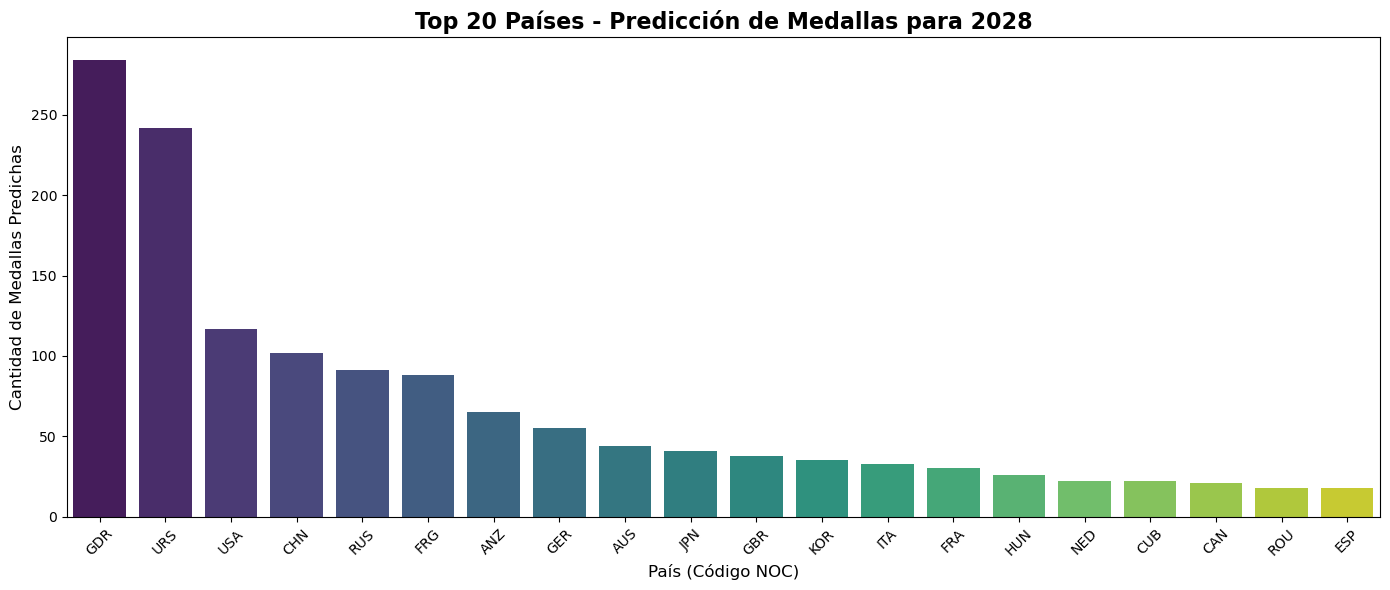

In [53]:
# Configuramos el tamaño de la gráfica (ancho, alto)
plt.figure(figsize=(14, 6))

# Creamos la gráfica de barras

# Agregamos títulos y etiquetas
sns.barplot(data=top_20, x='NOC', y='Prediccion_2028', hue='NOC', palette='viridis', legend=False)

plt.title('Top 20 Países - Predicción de Medallas para 2028', fontsize=16, fontweight='bold')
plt.xlabel('País (Código NOC)', fontsize=12)
plt.ylabel('Cantidad de Medallas Predichas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resultados 

GDR hace referencia a Alemania oriental y USR que es la Union Sovietica, dichos paises tuvieron una gran tasa de victorias durante la guerra fria, considerando los factores geograficos y eventos historicos actuales USA y CHIN son los paises con más tendencia a llevarse mas medallas para los juegos olimpicos del 2028.